In [ ]:
class SGD:
    def __init__(self, lr=0.01)
        self.lr = lr
    def update(self, params, grads)
        for key in params.keys():
            params[key] -= self.lr * grads[key]

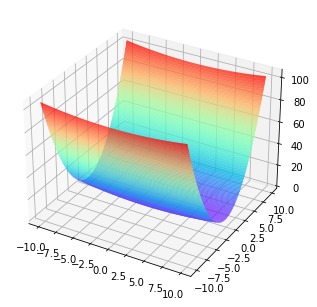

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)

x, y = np.meshgrid(x1, x2)
z = (x**2) / 20 + y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
      self.lr = lr
      self.momentum = momentum
      self.v = None
    def update(self, params, grads):
        if self.v == None:
           self.v = {}
           for key, val in params.items():
               self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
        for key, val in params.items():
            h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] ** 2
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

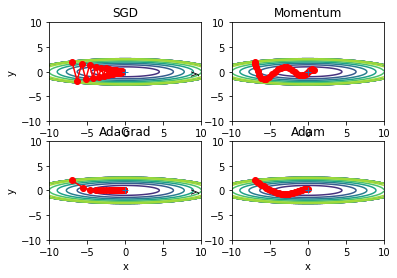

In [5]:
import sys, os
ds_path = os.path.join(os.curdir, 'codes')
sys.path.append(ds_path)
%run codes/ch06/optimizer_compare_naive.py

===========iteration:0===========
SGD:2.350483451164556
Momentum:2.4148826923384323
AdaGrad:2.388777265841636
Adam:2.2266673721020305
===========iteration:100===========
SGD:1.7698968716793748
Momentum:0.2594371113728845
AdaGrad:0.14834679177542104
Adam:0.20304852999698111
===========iteration:200===========
SGD:0.9800698431877568
Momentum:0.18420141557382197
AdaGrad:0.0782108507731655
Adam:0.2041024278258851
===========iteration:300===========
SGD:0.49237503619450373
Momentum:0.15476328970825942
AdaGrad:0.06374450034996726
Adam:0.10906175909635235
===========iteration:400===========
SGD:0.42199725518476394
Momentum:0.1406933674159832
AdaGrad:0.05723357236208777
Adam:0.09258202683065603
===========iteration:500===========
SGD:0.5450132920857076
Momentum:0.28756979290629053
AdaGrad:0.16341987813834455
Adam:0.24940260141975373
===========iteration:600===========
SGD:0.40132209370073274
Momentum:0.1897929551319028
AdaGrad:0.07484729686189434
Adam:0.07185925817578595
===========iteration:7

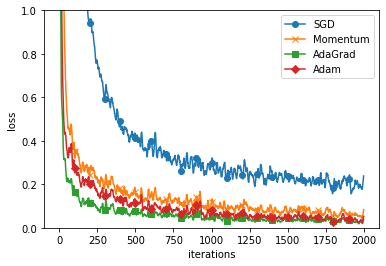

In [6]:
%run codes/ch06/optimizer_compare_mnist.py

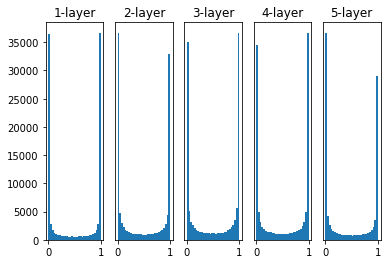

In [7]:
%run codes/ch06/weight_init_activation_histogram.py

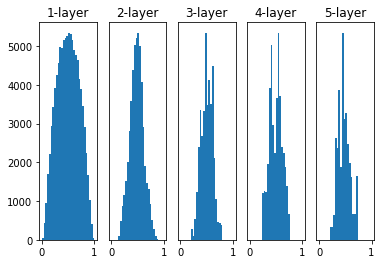

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


===========iteration:0===========
std=0.01:2.302423415150182
Xavier:2.3070094241301993
He:2.3131757140698515
===========iteration:100===========
std=0.01:2.30266383822296
Xavier:2.238552355062608
He:1.5505057041090846
===========iteration:200===========
std=0.01:2.3024853307672286
Xavier:2.109901331342141
He:0.7742954593511533
===========iteration:300===========
std=0.01:2.3032060825640253
Xavier:1.8804912692631055
He:0.6020993135005894
===========iteration:400===========
std=0.01:2.2984014998352187
Xavier:1.359958596890498
He:0.3951102716222591
===========iteration:500===========
std=0.01:2.3020180235098224
Xavier:0.9724303076011759
He:0.457486475000061
===========iteration:600===========
std=0.01:2.3043097149110165
Xavier:0.7788480598430376
He:0.3566350650016614
===========iteration:700===========
std=0.01:2.3032936751041113
Xavier:0.6037746669170996
He:0.3653511525721912
===========iteration:800===========
std=0.01:2.3030485218399184
Xavier:0.4298035899376402
He:0.22959311488115175


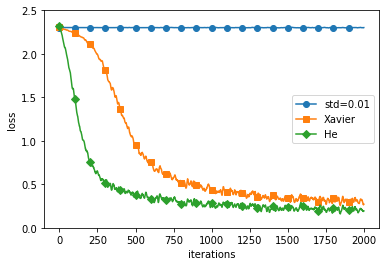

In [12]:
%run codes/ch06/weight_init_compare.py

============== 1/16 ==============
epoch:0 | 0.116 - 0.123
epoch:1 | 0.105 - 0.141
epoch:2 | 0.105 - 0.127
epoch:3 | 0.105 - 0.14
epoch:4 | 0.105 - 0.146
epoch:5 | 0.105 - 0.179
epoch:6 | 0.105 - 0.181
epoch:7 | 0.105 - 0.204
epoch:8 | 0.105 - 0.228
epoch:9 | 0.105 - 0.257
epoch:10 | 0.116 - 0.277
epoch:11 | 0.116 - 0.297
epoch:12 | 0.116 - 0.316
epoch:13 | 0.116 - 0.338
epoch:14 | 0.116 - 0.342
epoch:15 | 0.116 - 0.357
epoch:16 | 0.116 - 0.377
epoch:17 | 0.116 - 0.391
No handles with labels found to put in legend.
epoch:18 | 0.116 - 0.407
epoch:19 | 0.116 - 0.406
============== 2/16 ==============
epoch:0 | 0.097 - 0.124
epoch:1 | 0.097 - 0.128
epoch:2 | 0.097 - 0.114
epoch:3 | 0.097 - 0.133
epoch:4 | 0.097 - 0.152
epoch:5 | 0.097 - 0.173
epoch:6 | 0.097 - 0.189
epoch:7 | 0.097 - 0.22
epoch:8 | 0.097 - 0.24
epoch:9 | 0.097 - 0.259
epoch:10 | 0.097 - 0.286
epoch:11 | 0.097 - 0.311
epoch:12 | 0.097 - 0.337
epoch:13 | 0.097 - 0.349
epoch:14 | 0.097 - 0.366
epoch:15 | 0.097 - 0.385
epoch:

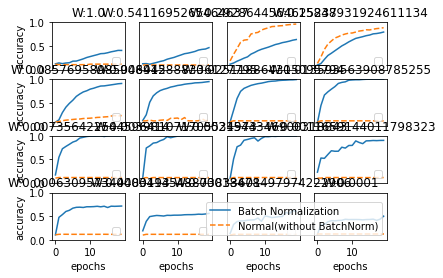

In [13]:
%run codes/ch06/batch_norm_test.py

epoch:0, train acc:0.10666666666666667, test acc:0.0988
epoch:1, train acc:0.12333333333333334, test acc:0.1017
epoch:2, train acc:0.13, test acc:0.1101
epoch:3, train acc:0.13333333333333333, test acc:0.1145
epoch:4, train acc:0.14666666666666667, test acc:0.1302
epoch:5, train acc:0.17666666666666667, test acc:0.145
epoch:6, train acc:0.18666666666666668, test acc:0.1526
epoch:7, train acc:0.20333333333333334, test acc:0.171
epoch:8, train acc:0.23, test acc:0.186
epoch:9, train acc:0.24333333333333335, test acc:0.1973
epoch:10, train acc:0.2733333333333333, test acc:0.205
epoch:11, train acc:0.26, test acc:0.2081
epoch:12, train acc:0.2733333333333333, test acc:0.2159
epoch:13, train acc:0.28, test acc:0.2216
epoch:14, train acc:0.27666666666666667, test acc:0.2193
epoch:15, train acc:0.32, test acc:0.2421
epoch:16, train acc:0.33666666666666667, test acc:0.2463
epoch:17, train acc:0.38666666666666666, test acc:0.2645
epoch:18, train acc:0.36333333333333334, test acc:0.2628
epoch:19

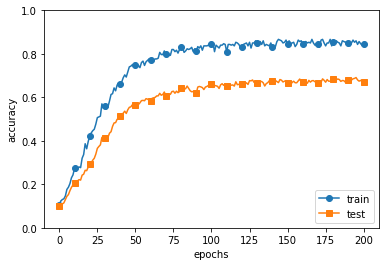

In [14]:
%run codes/ch06/overfit_weight_decay.py

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    def forward(self, x, train_flag=True):
        if not train_flag:
            return x * (1 - self.dropout_ratio)
        self.mask = np.random.randn(*x.shape) > self.dropout_ratio
        return x[mask]
    def backward(self, dout):
        return dout * self.mask

253551120141268
=== epoch:168, train acc:0.49333333333333335, test acc:0.3717 ===
train loss:1.580192717258933
train loss:1.7761073053129823
train loss:1.732507407780241
=== epoch:169, train acc:0.5, test acc:0.3781 ===
train loss:1.6876236699133107
train loss:1.723894614957384
train loss:1.6368638385290724
=== epoch:170, train acc:0.5066666666666667, test acc:0.3787 ===
train loss:1.5733515062355983
train loss:1.7134793397028716
train loss:1.7308736155606876
=== epoch:171, train acc:0.51, test acc:0.3819 ===
train loss:1.6982216845083942
train loss:1.6108570327853824
train loss:1.7015173045123178
=== epoch:172, train acc:0.52, test acc:0.389 ===
train loss:1.8095569147925519
train loss:1.595513229407365
train loss:1.7612605553091591
=== epoch:173, train acc:0.52, test acc:0.3884 ===
train loss:1.6357814800161734
train loss:1.7162820348914587
train loss:1.7313777450967849
=== epoch:174, train acc:0.5166666666666667, test acc:0.3918 ===
train loss:1.742757530453547
train loss:1.74621629

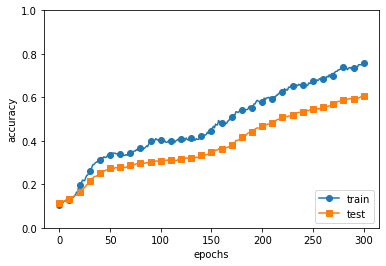

In [15]:
%run codes/ch06/overfit_dropout.py

In [ ]:
%run codes/ch06/hyperparameter_optimization.py